In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Variables definition

In [11]:
radius_upper = 0.85
radius_lower = 0.85

x_start, y_start = 0, 0
radius = np.linspace(radius_upper, radius_lower, num=100)

radius_lower2 = 0.0
radius2 = np.linspace(radius_upper, radius_lower2, num=100)

horizontal_increment = 0.08
radius_upper = 0.9

semi_major_x = 0.05
semi_major_y = np.linspace(radius_upper, radius_upper / 2, num=12)

theta = np.linspace(0, 2 * np.pi, 100)
circle_radius = 1
x_circle = circle_radius * np.cos(theta)
y_circle = circle_radius * np.sin(theta)

# Circular

In [12]:
x = x_start + radius * np.cos(theta)
y = y_start + radius * np.sin(theta)
circle_coordinates = np.column_stack([x, y])

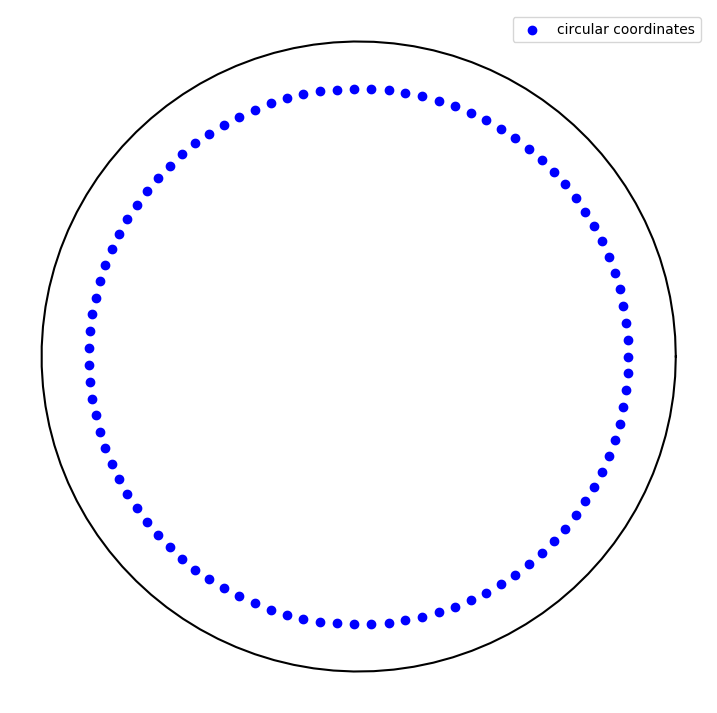

In [13]:
plt.figure(figsize=(9, 9))
plt.plot(x_circle, y_circle, color="black")
plt.scatter(circle_coordinates[:, 0][1:], circle_coordinates[:, 1][1:], color='blue', marker='o', label='circular coordinates')

plt.axis('off')
plt.legend()

plt.savefig("../plots/circular_motion.png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Whirlstorm

In [14]:
x_coordinates = x_start + radius2 * np.cos(theta)
y_coordinates = y_start + radius2 * np.sin(theta)

spiral_coordinates = np.column_stack([x_coordinates, y_coordinates])

In [15]:
x_coordinates = x_start + radius2 * np.sin(theta)
y_coordinates = y_start + radius2 * np.cos(theta)
spiral_coordinates2 = np.column_stack([x_coordinates, y_coordinates])
spiral_coordinates2 = spiral_coordinates2[::-1]

In [16]:
x_coordinates = x_start + radius2 * np.sin(np.flipud(theta))
y_coordinates = y_start + radius2 * np.cos(np.flipud(theta))
spiral_coordinates3 = np.column_stack([x_coordinates, y_coordinates])

In [17]:
x_coordinates = x_start + radius2 * np.cos(np.flipud(theta))
y_coordinates = y_start + radius2 * np.sin(np.flipud(theta))
spiral_coordinates4 = np.column_stack([x_coordinates, y_coordinates])[::-1]

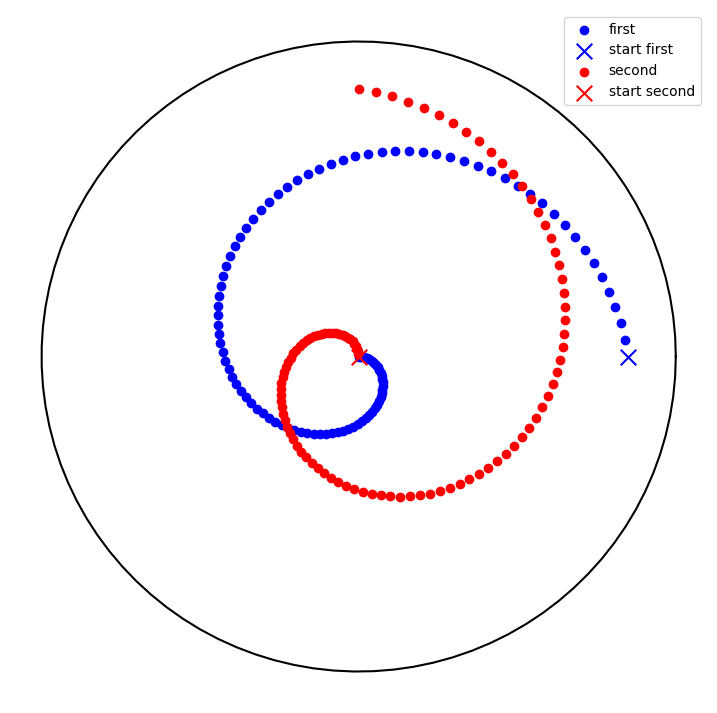

In [18]:
plt.figure(figsize=(9, 9))
plt.plot(x_circle, y_circle, color="black")
plt.scatter(spiral_coordinates[:, 0][1:], spiral_coordinates[:, 1][1:], color='blue', marker='o', label='first')
plt.scatter(spiral_coordinates[:, 0][0], spiral_coordinates[:, 1][0], color='blue', marker='x', s=125,
            label='start first')

plt.scatter(spiral_coordinates2[:, 0][1:], spiral_coordinates2[:, 1][1:], color='red', marker='o', label='second')
plt.scatter(spiral_coordinates2[:, 0][0], spiral_coordinates2[:, 1][0], color='red', marker='x', s=125,
            label='start second')

plt.axis('off')
plt.legend()

plt.savefig("../plots/whirlstorm1.png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

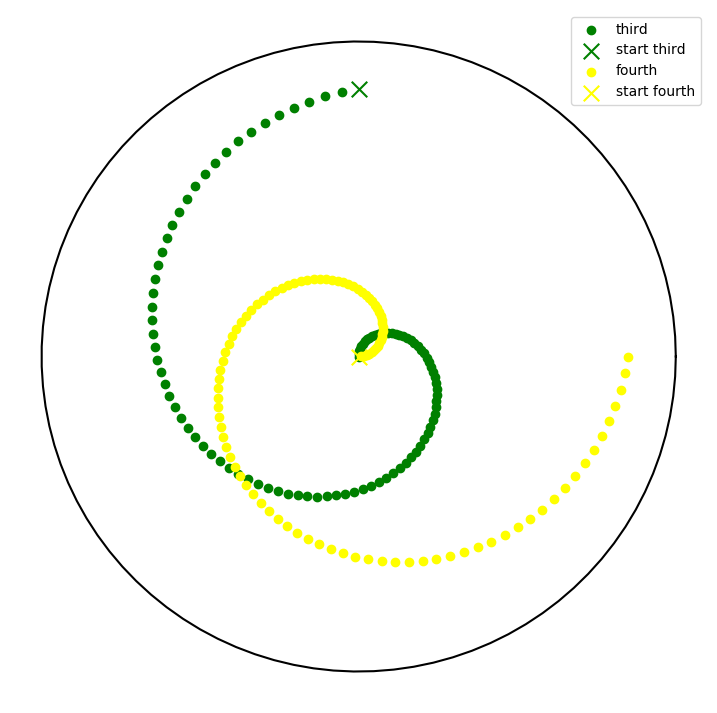

In [19]:
plt.figure(figsize=(9, 9))
plt.plot(x_circle, y_circle, color="black")
plt.scatter(spiral_coordinates3[:, 0][1:], spiral_coordinates3[:, 1][1:], color='green', marker='o', label='third')
plt.scatter(spiral_coordinates3[:, 0][0], spiral_coordinates3[:, 1][0], color='green', marker='x', s=125,
            label='start third')

plt.scatter(spiral_coordinates4[:, 0][1:], spiral_coordinates4[:, 1][1:], color='yellow', marker='o', label='fourth')
plt.scatter(spiral_coordinates4[:, 0][0], spiral_coordinates4[:, 1][0], color='yellow', marker='x', s=125,
            label='start fourth')

plt.axis('off')
plt.legend()

plt.savefig("../plots/whirlstorm2.png", bbox_inches = 'tight', pad_inches = 0)
plt.show()

# Folding Motion

In [20]:
line_start = x_start + radius_upper * np.cos(0)
line = np.linspace([x_start, line_start], [x_start, y_start], num=10)

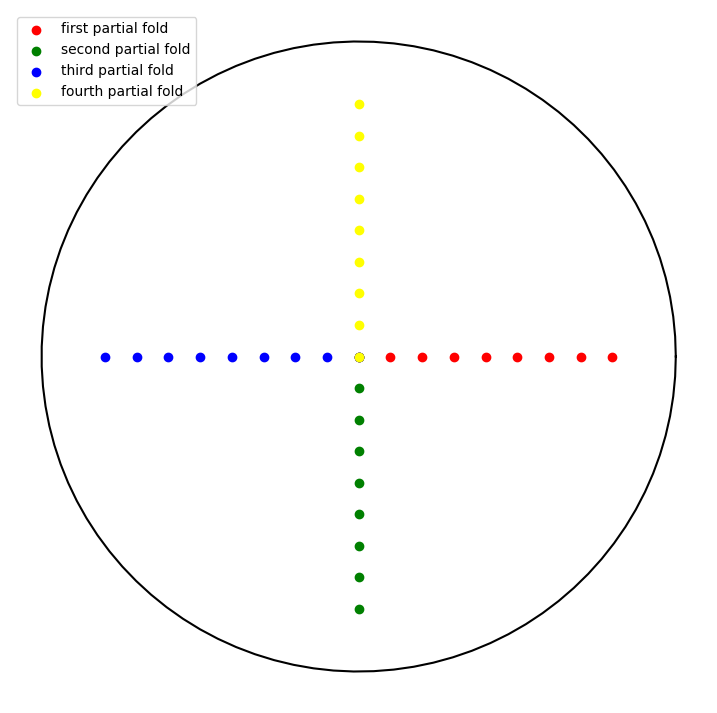

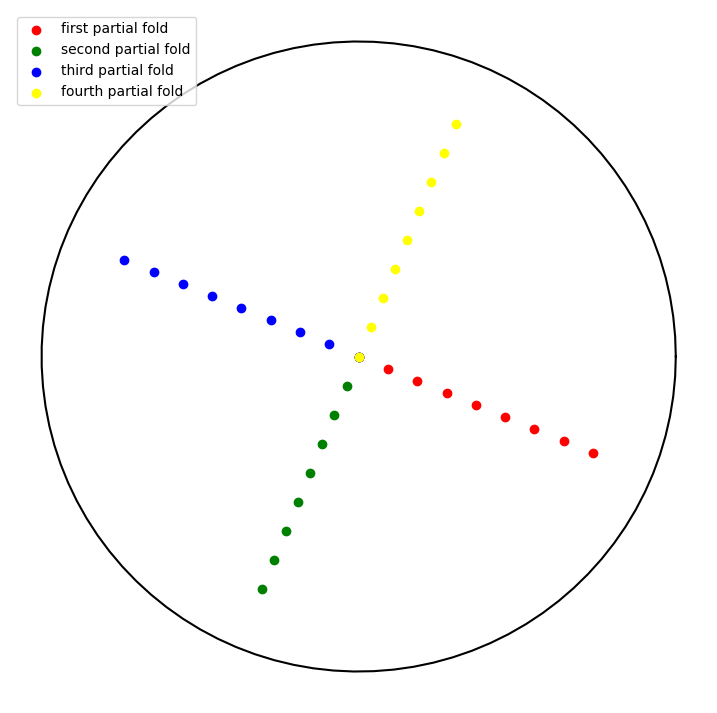

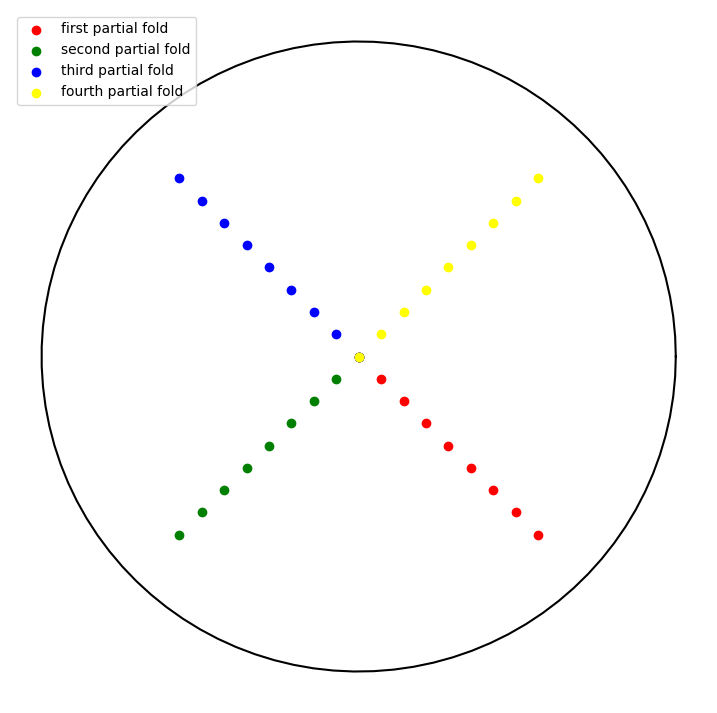

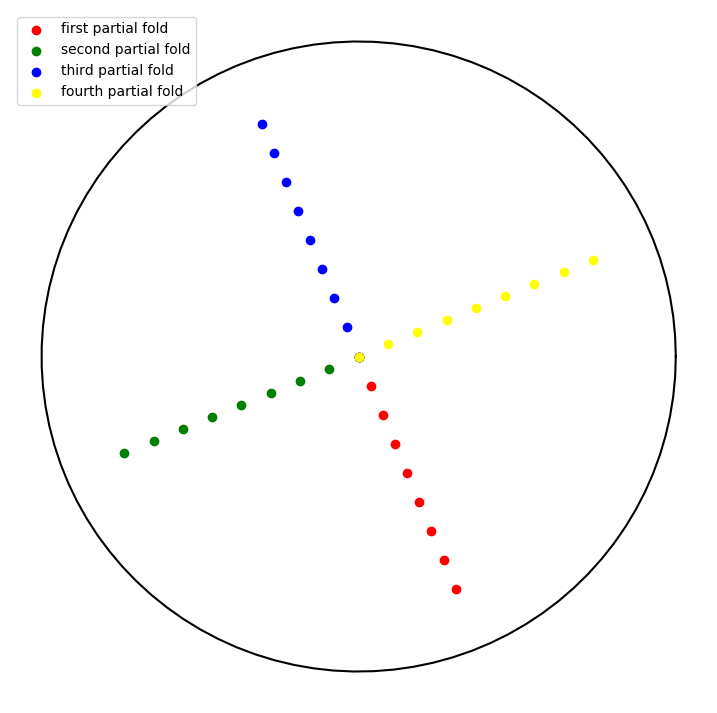

In [21]:
colors = ["red", "green", "blue", "yellow"]
labels = ["first partial fold", "second partial fold", "third partial fold", "fourth partial fold"]
for x in range(4):
    plt.figure(figsize=(9, 9))
    plt.plot(x_circle, y_circle, color="black")
    radian_shift1 = np.radians(22.5)
    radian_shift2 = np.radians(90.0)
    rotation_matrix = np.array([[np.cos(radian_shift1), -np.sin(radian_shift1)],
                                [np.sin(radian_shift1), np.cos(radian_shift1)]])

    rotation_matrix2 = np.array([[np.cos(radian_shift2), -np.sin(radian_shift2)],
                                 [np.sin(radian_shift2), np.cos(radian_shift2)]])

    for y in range(4):
        line = line @ rotation_matrix2
        plt.scatter(line[:, 0][1:], line[:, 1][1:], color=colors[y], marker='o', label=labels[y])
    line = line @ rotation_matrix

    plt.axis('off')
    plt.legend()

    plt.savefig(f"../plots/folding{x}.png", bbox_inches = 'tight', pad_inches = 0)
    plt.show()


# HorizontalEllipticalMotion

No handles with labels found to put in legend.


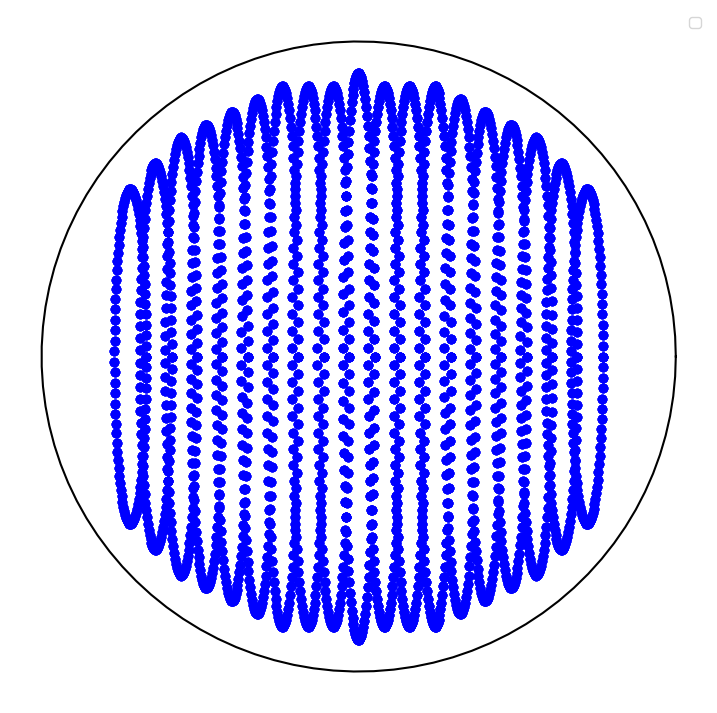

In [22]:
x = x_start + semi_major_x * np.cos(theta)
increment_x = True
ellipses = []
plt.figure(figsize=(9, 9))
for i in range(100):
    for y_radius in semi_major_y:
        y = y_start + y_radius * np.sin(theta)
        coordinates = np.column_stack([x, y])
        inside_circle = np.linalg.norm(coordinates - np.array([0, 0]),
                                                       axis=1) < radius_upper
        if np.all(inside_circle):
            plt.scatter(coordinates[:,0], coordinates[:, 1], color="blue")
            break
    if increment_x:
        x += horizontal_increment
        if np.all(np.linalg.norm([x - x_start], axis=0) > radius_upper):
            increment_x = False
    else:
        x -= horizontal_increment
        if np.all(np.linalg.norm([x - x_start], axis=0) > radius_upper):
            increment_x = True



plt.plot(x_circle, y_circle, color="black")
plt.axis('off')
plt.legend()

plt.savefig("../plots/horizontal_elliptical.png", bbox_inches = 'tight', pad_inches = 0)
plt.show()